# OIC-201 - Analyzing mito content and mtDNA in C. elegans

## Image description
* ND2 files
* Sizes:
  *  704 x 704
  *  Size Z: 7
  *  Size C: 2 (0 - mitochondria, 1 - mtDNA)
* Shape: (704, 704, 7, 2)

## Analysis
* Normalized area of the tail region imaged covered by the mitochondria (3D)
* Density measurement of the nucleoid puncta in the mito signal (3D)
* Signed distance of the nucleoid centroids to the mito network (3D)

## To clarify:
- What is the normalized area?
- Density measurement?

In [18]:
from bioio import BioImage
from matplotlib import pyplot as plt
import numpy as np
import skimage
from scipy import stats, ndimage
import math
import csv
import random

In [2]:
#Settings

#Path to image file
path = ("..\\data\\Day 1 adult animals\\D1A_rep 1.nd2")

#Sensitivity for segmentation (higher number means less pixels in objects)
sensitivity = 2
#Create a BioImage reader
reader = BioImage(path)

#Read in image data
data = reader.get_image_data("YXZC", T=0)

#Get pixel size for image metadata
pxSizeX = reader.physical_pixel_sizes.X
pxSizeY = reader.physical_pixel_sizes.Y
pxSizeZ = reader.physical_pixel_sizes.Z

print(pxSizeX)
print(pxSizeY)
print(pxSizeZ)

print(data.shape)



0.090187975535876
0.090187975535876
0.9
(704, 704, 7, 2)


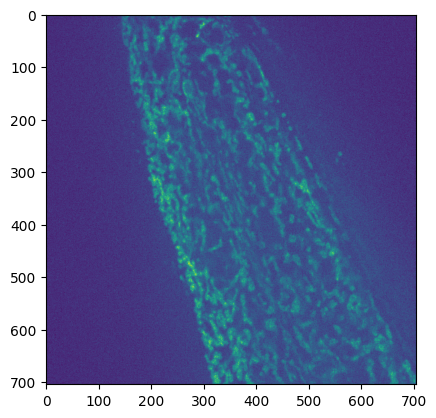

In [9]:
currData = data[:, :, 2, 0].squeeze()

plt.imshow(currData)

## Mitochondrial area

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


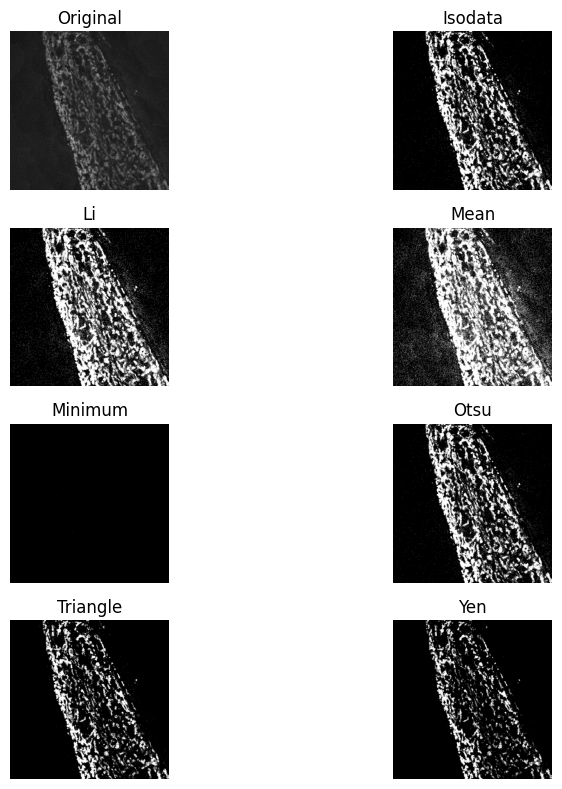

In [12]:
currSlice = data[:, :, 2, 0].squeeze()

# Clean up the image
filtImage = skimage.morphology.white_tophat(currSlice, skimage.morphology.disk(50))



skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


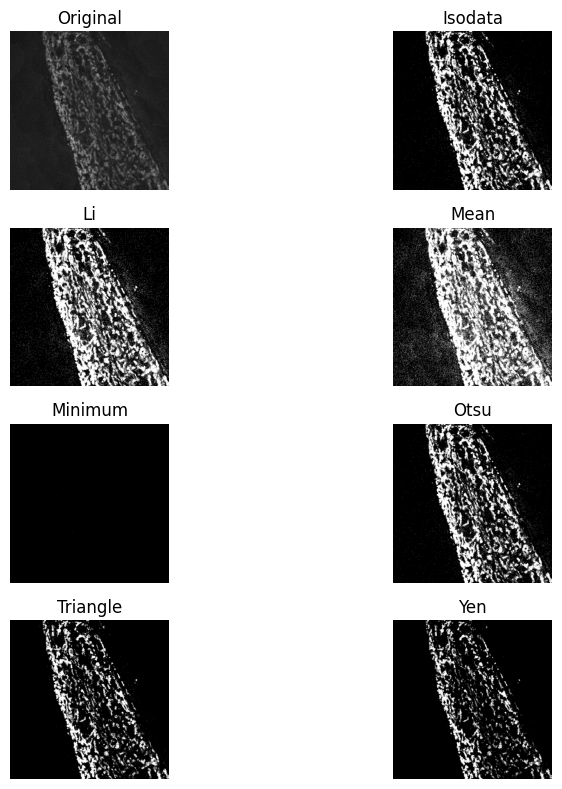

In [27]:
# Segment by intensity
fig, ax = skimage.filters.try_all_threshold(filtImage, figsize=(10,8))
plt.show()

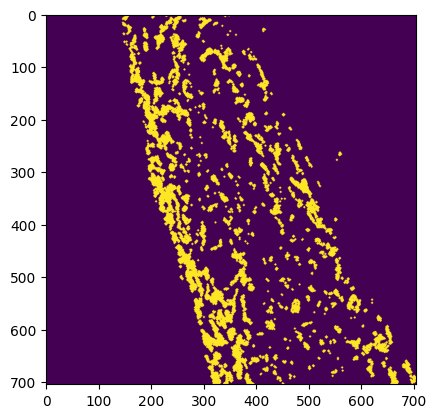

In [28]:
thresh = skimage.filters.threshold_otsu(filtImage)

mask = filtImage >= thresh
mask = skimage.morphology.binary_opening(mask, skimage.morphology.disk(2))

plt.imshow(mask)

In [29]:
# Run through all slices
mask = np.zeros(data.shape[:3])

for z in range(data.shape[2]):
    currSlice = data[:, :, z, 0].squeeze()

    #Remove background
    currSlice = skimage.morphology.white_tophat(currSlice, skimage.morphology.disk(50))
    
    thresh = skimage.filters.threshold_otsu(currSlice)
    
    currMask = currSlice >= thresh
    currMask = skimage.morphology.binary_opening(currMask, skimage.morphology.disk(2))

    #currMask = skimage.morphology.remove_small_objects(currMask, 200)
    mask[:, :, z] = currMask

##Remove objects which touch the image border
#mask = skimage.segmentation.clear_border(mask)

#Label the mask
label, nObjs = skimage.measure.label(mask, return_num=True)

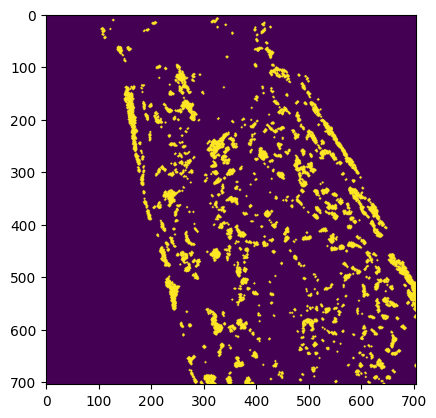

In [32]:
plt.imshow(mask[:, :, 6])

## Find spots

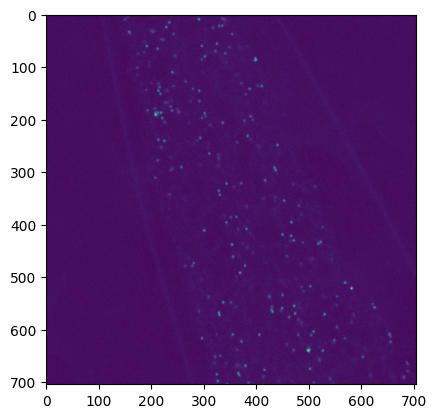

In [34]:
currSpotImg = data[:, :, 2, 1].squeeze()

currSpotImg = skimage.morphology.white_tophat(currSpotImg, skimage.morphology.disk(50))

plt.imshow(currSpotImg)



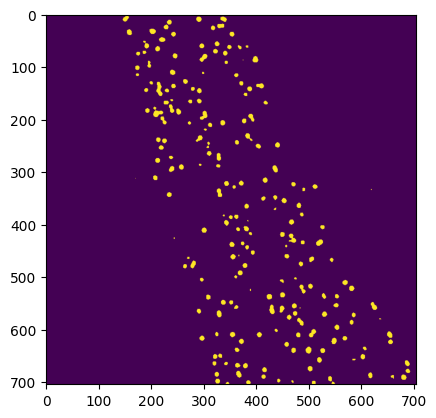

In [52]:
diffGauss = skimage.filters.difference_of_gaussians(currSpotImg, 2, 7)

spotMask = diffGauss >= 0.0001

#plt.imshow(diffGauss)
#plt.colorbar()

plt.imshow(spotMask)




In [56]:
#Label the mask
label, nObjs = skimage.measure.label(spotMask, return_num=True)

data_table = skimage.measure.regionprops_table(label, currSpotImg,
                                               properties=['Centroid'])

print(data_table)

{'Centroid-0': array([4.28571429e-01, 8.23863636e+00, 9.37037037e+00, 9.19318182e+00,
       1.51076923e+01, 2.20967742e+01, 2.43593750e+01, 2.59272727e+01,
       3.23877551e+01, 3.42380952e+01, 3.78548387e+01, 3.77538462e+01,
       4.82380952e+01, 5.85058824e+01, 5.62063492e+01, 6.01846154e+01,
       6.22941176e+01, 6.27368421e+01, 6.13000000e+01, 6.56478873e+01,
       7.03709677e+01, 7.23611111e+01, 7.40000000e+01, 7.48139535e+01,
       7.91911765e+01, 8.26746032e+01, 8.59902913e+01, 8.70000000e+01,
       9.54923077e+01, 9.15000000e+01, 1.01701754e+02, 1.10487500e+02,
       1.11600000e+02, 1.15000000e+02, 1.15891304e+02, 1.27800000e+02,
       1.30468750e+02, 1.31372549e+02, 1.42408163e+02, 1.36000000e+02,
       1.36526316e+02, 1.41910448e+02, 1.41883721e+02, 1.44200000e+02,
       1.45469697e+02, 1.45044444e+02, 1.52500000e+02, 1.65152542e+02,
       1.63388889e+02, 1.65886364e+02, 1.67983607e+02, 1.68255814e+02,
       1.79728155e+02, 1.78708333e+02, 1.83137931e+02, 1.85243

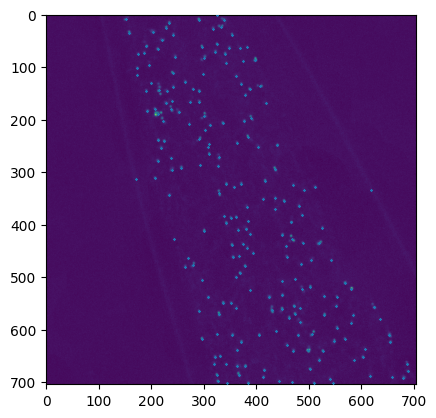

In [66]:

implot = plt.imshow(currSpotImg)

plt.scatter(data_table["Centroid-1"], data_table["Centroid-0"], s=1, zorder=3, marker="x")

plt.show()

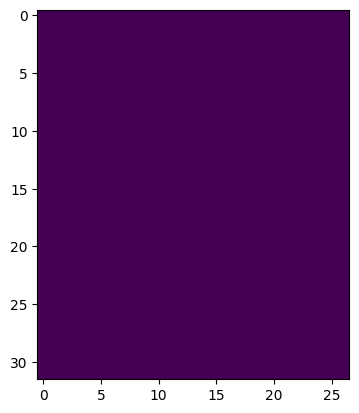

In [13]:
mask = skimage.io.imread("..\\data\\qupath_test\\export\\D1A_rep 1.nd2 - D1A_rep 1.nd2 (series 1)\\Region 1.png")
mask = skimage.color.rgb2gray(mask)
mask = mask > 0

plt.imshow(mask)

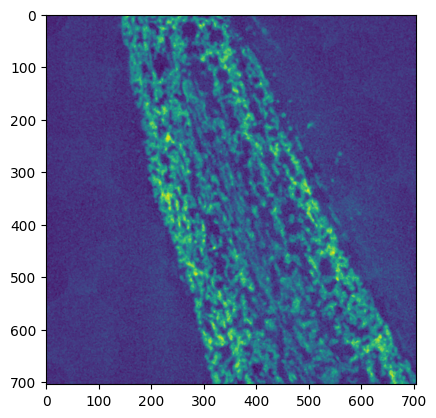

In [9]:
# Segment the tail region

combinedImage = skimage.exposure.equalize_adapthist(data[:, :, 1, 0].squeeze()) + skimage.exposure.equalize_adapthist(data[:, :, 2, 0].squeeze())

combinedImage_cleaned = skimage.morphology.white_tophat(combinedImage, footprint=skimage.morphology.disk(40))
combinedImage_cleaned = skimage.filters.median(combinedImage_cleaned, footprint=np.ones((3,3)), mode='nearest')


plt.clf()
plt.imshow(combinedImage_cleaned)




skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


<Figure size 640x480 with 0 Axes>

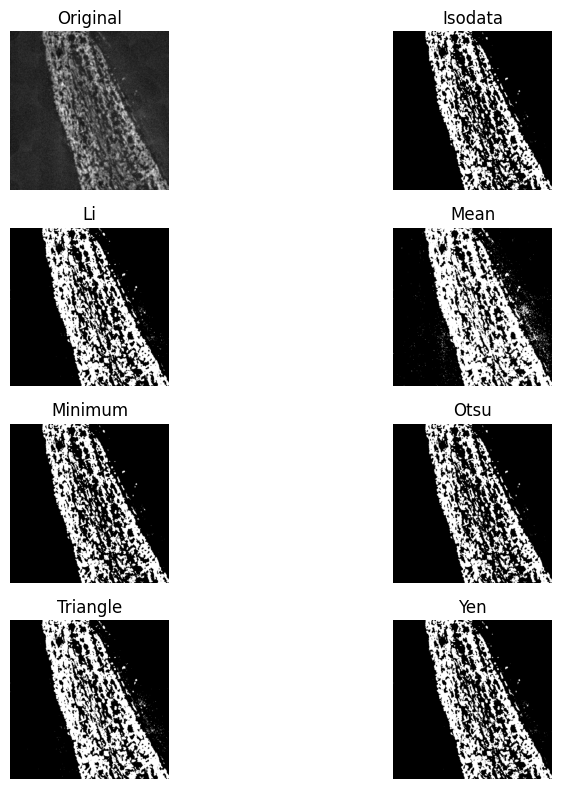

In [11]:
plt.clf()
fig, ax = skimage.filters.try_all_threshold(combinedImage_cleaned, figsize=(10,8))
plt.show()

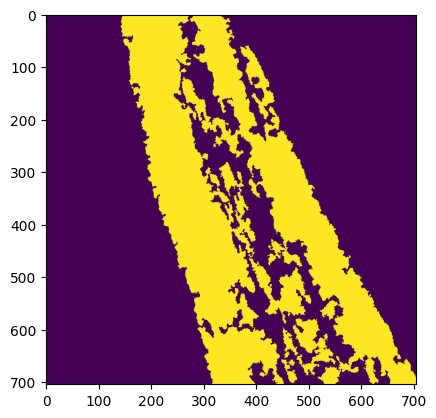

In [19]:
thLvl = skimage.filters.threshold_li(combinedImage_cleaned)
mask_tail = combinedImage_cleaned > thLvl

mask_tail = skimage.morphology.remove_small_objects(mask_tail, 500)
mask_tail = skimage.morphology.remove_small_holes(mask_tail, 500)
mask_tail = ndimage.binary_fill_holes(mask_tail)

mask_tail_chull = skimage.morphology.convex_hull_image(mask_tail)


plt.imshow(mask_tail)